In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

dataset = pd.read_csv('Knn.csv')

In [3]:
dataset

,sepal-length,seapl-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.4,Iris-virginica
5,5.4,3.0,1.7,0.5,Iris-virginica
6,6.0,2.5,1.7,0.8,Iris-virginica
7,6.4,3.1,1.8,1.1,Iris-virginica
8,6.7,3.4,2.3,1.3,Iris-Setosa
9,6.3,3.6,2.5,1.5,Iris-Setosa


In [5]:
dataset.head()

,sepal-length,seapl-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.4,Iris-virginica


In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.4],
       [5.4, 3. , 1.7, 0.5],
       [6. , 2.5, 1.7, 0.8],
       [6.4, 3.1, 1.8, 1.1],
       [6.7, 3.4, 2.3, 1.3],
       [6.3, 3.6, 2.5, 1.5]])

In [7]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
X_train

array([[6.4, 3.1, 1.8, 1.1],
       [5. , 3.6, 1.4, 0.4],
       [6.3, 3.6, 2.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [6.7, 3.4, 2.3, 1.3],
       [4.9, 3. , 1.4, 0.2]])

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0]
 [2 0]]
                precision    recall  f1-score   support

   Iris-Setosa       0.50      1.00      0.67         2
Iris-virginica       0.00      0.00      0.00         2

      accuracy                           0.50         4
     macro avg       0.25      0.50      0.33         4
  weighted avg       0.25      0.50      0.33         4



c:\users\divyanshu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\divyanshu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\divyanshu\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [29]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 6, n_neighbors = 7

ValueError: x and y must have same first dimension, but have shapes (39,) and (8,)

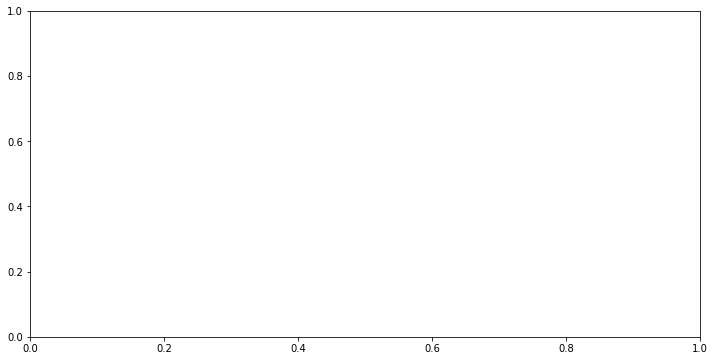

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

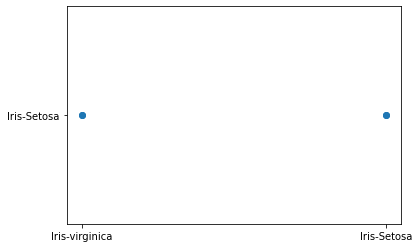

In [30]:
plt.scatter(y_test[0:6],y_pred[0:6])

In [31]:
print(y_test)

['Iris-virginica' 'Iris-Setosa' 'Iris-Setosa' 'Iris-virginica']


In [32]:
print(y_pred[0:8])

['Iris-Setosa' 'Iris-Setosa' 'Iris-Setosa' 'Iris-Setosa']
